
# "Customer Shopping Trends"
**[Link here](https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset)**

My EDA is shown below results and predictions by using three regression models. What will be the summary
according to the below finding? What approaches are used to make business profitable by seeing them? 
What type of decisions we can make from these findings?

## Demographic Insights
1- Males are more contributor than females in the purchases
2- Age range of customer is 18-70

## Purchase Patterns
1- Minimum Purchase amount is 20$
2- Reviews range from a minimum of 2.5 to a maximum of 5
3- Medium-sized products witness the highest sales compared to other sizes
4- Olive-colored items have a higher sales volume compared to other colors
5- Most sales occur during the spring season
6- The least sales are observed during the winter season

## Product Attributes
1- Products with medium sizes receive the highest review ratings, while larger sizes have the lowest
2- Medium-sized products are significant contributors to overall sales

## Business Strategy Implications

# Targeted Marketing
The data indicates a significant male customer base. Consider diversifying marketing strategies to attract more female customers.

# Age-Driven Marketing Strategies
Analyze age distribution to tailor marketing strategies for different age groups.

# Pricing Strategies
Use purchase amounts to decide on promotions and discounts, formulating effective pricing strategies.

# Customer Satisfaction
Prioritize addressing low ratings by identifying and resolving issues such as product quality and delivery. Utilize Customer Relations Officers (CROs) and customer reviews for confirmation.

# Product Focus
Focus marketing efforts on medium-sized products, the main contributors to sales.

# Inventory and Production
Leverage color insights for inventory and production decisions.

# Seasonal Planning
Plan marketing campaigns, inventory management, and production based on seasonal trends.

# Product Suitability
Evaluate product suitability for winter to address lower sales during this season.

# City-Wise Analysis
Investigate customer characteristics in "Montana" for insights into higher sales. Explore opportunities for improvement in "Kansas" due to lower sales.

# Payment Optimization
Optimize the checkout experience based on preferred payment methods.


In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
 "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
 "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

#Regression Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

#Import Metrics
from sklearn.metrics import mean_absolute_error,mean_absolute_error,r2_score

# #DecisionTreeClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score,accuracy_score,precision_score


In [121]:
fpath= "D:\\Data analyst\\Data Sciences\\datasets\\Customer shoping trend\\shopping_trends_updated.csv"
smc=pd.read_csv(fpath)
cstrend=smc
marketrend=smc


In [122]:
smc.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [123]:
smc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [124]:
smc.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [125]:
Min_review_rating=smc["Review Rating"].min()
print(Min_review_rating)
min_reviewed_item=smc[smc["Review Rating"]==Min_review_rating]["Item Purchased"].unique()
print(min_reviewed_item)

2.5
['Sweater' 'Handbag' 'Belt' 'Backpack' 'Gloves' 'Hoodie' 'Shorts'
 'Sandals' 'Coat' 'Socks' 'Sneakers' 'Sunglasses' 'Jacket' 'Boots' 'Shirt'
 'Hat' 'Jewelry' 'Shoes' 'Scarf' 'Dress' 'Skirt' 'Pants' 'Jeans' 'T-shirt']


In [126]:
Max_review_rating=smc["Review Rating"].max()
print(Max_review_rating)
max_reviewed_item=smc[smc["Review Rating"]==Max_review_rating]["Item Purchased"].unique()
print(max_reviewed_item)


5.0
['Shorts' 'Belt' 'Jewelry' 'Backpack' 'Coat' 'Hat' 'Shirt' 'Boots'
 'Handbag' 'Jacket' 'Blouse' 'Sandals' 'Sunglasses' 'Sneakers' 'T-shirt'
 'Jeans' 'Scarf' 'Hoodie' 'Gloves' 'Dress' 'Socks' 'Skirt' 'Sweater'
 'Pants']


In [127]:
smc.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [128]:
smc.dtypes


Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

## Check Normalization of data
## Use Shapiro welk or kolmogroov, if value is less than 0.05, data is normal othewise need to normalize it
## These tests will work on numerical data


In [129]:
smc.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [130]:
smc.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [131]:
from scipy.stats import shapiro
data=smc["Age"].dropna()
statistics,p_value=shapiro(data)
print(statistics,p_value)


0.9550292491912842 4.4223607253491293e-33


In [132]:
if p_value>0.05:
 print("Data is normal")
else:
 print("Data is not normal")

Data is not normal


<Axes: ylabel='Age'>

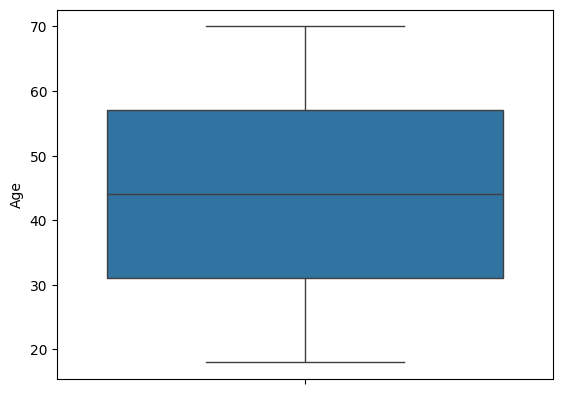

In [133]:
sns.boxplot(smc["Age"])

In [134]:
smc.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [135]:
max_age=smc["Age"].max()
max_age

70

In [136]:
max_pur=smc["Purchase Amount (USD)"].max()
max_pur


100

In [137]:
max_rev=smc["Review Rating"].max()
max_rev

5.0

In [138]:
max_prev_pur=smc["Previous Purchases"].max()
max_prev_pur

50

In [139]:
new_age=(smc["Age"])/(smc["Age"].max())
new_age

0       0.785714
1       0.271429
2       0.714286
3       0.300000
4       0.642857
          ...   
3895    0.571429
3896    0.742857
3897    0.657143
3898    0.628571
3899    0.742857
Name: Age, Length: 3900, dtype: float64

In [140]:
new_pur=(smc["Purchase Amount (USD)"])/max_pur
new_pur


0       0.53
1       0.64
2       0.73
3       0.90
4       0.49
        ... 
3895    0.28
3896    0.49
3897    0.33
3898    0.77
3899    0.81
Name: Purchase Amount (USD), Length: 3900, dtype: float64

In [141]:
new_rev=smc["Review Rating"]/max_rev
new_rev


0       0.62
1       0.62
2       0.62
3       0.70
4       0.54
        ... 
3895    0.84
3896    0.90
3897    0.58
3898    0.76
3899    0.62
Name: Review Rating, Length: 3900, dtype: float64

In [142]:
new_prev_pur=(smc["Previous Purchases"])/max_prev_pur
new_prev_pur

0       0.28
1       0.04
2       0.46
3       0.98
4       0.62
        ... 
3895    0.64
3896    0.82
3897    0.48
3898    0.48
3899    0.66
Name: Previous Purchases, Length: 3900, dtype: float64

In [143]:
#below is showing normalized data


In [144]:
shapir_age=smc["Age"]
statistics,p_value=shapiro(shapir_age)
print(statistics,p_value)
if p_value>0.05:
 print("data is normal")
else:
 print("data is not normal")

0.9550292491912842 4.4223607253491293e-33
data is not normal


<Axes: xlabel='Age', ylabel='Count'>

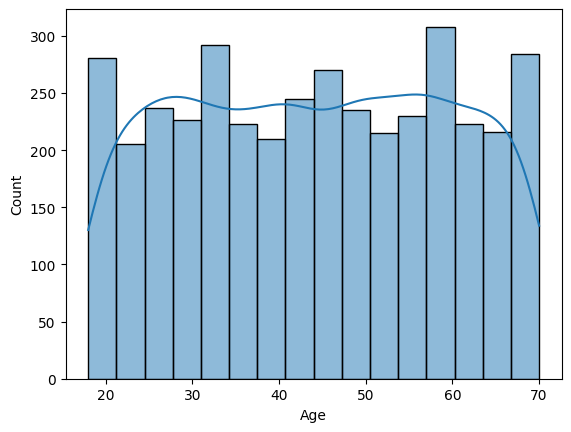

In [145]:
sns.histplot(smc,x=smc["Age"],kde=True)

In [146]:
#Do it Normal
#Apply Log_transform or Z_score,boccox etc

#Z_score
#smc["Age"]=(smc["Age"]-smc["Age"].mean())/smc["Age"].std()
#boxcox


In [147]:
shapir_age=smc["Age"]
statistics,p_value=shapiro(shapir_age)
print(statistics,p_value)
if p_value>0.05:
 print("data is normal")
else:
 print("data is not normal")

0.9550292491912842 4.4223607253491293e-33
data is not normal


In [148]:
outlr=smc["Age"]

<Axes: ylabel='Age'>

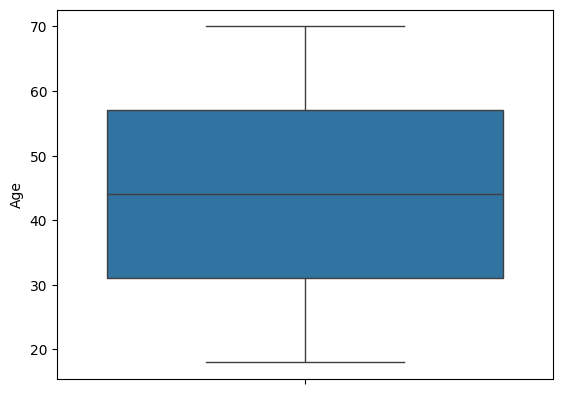

In [149]:
sns.boxplot(data=smc,y=smc["Age"])

In [150]:
smc_lin=smc[(smc["Age"]>=20) & (smc["Age"]<=75)]
smc_lin

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


<Axes: ylabel='Age'>

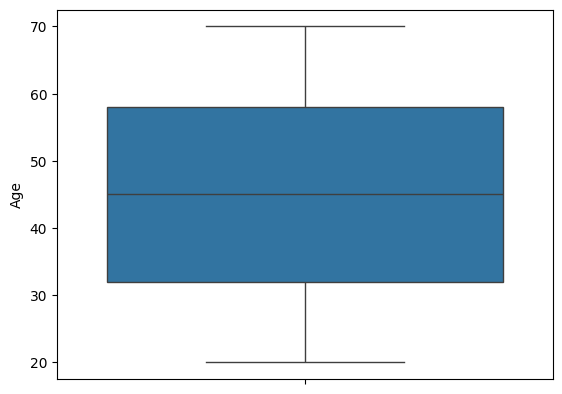

In [151]:
sns.boxplot(data=smc_lin,y=smc_lin["Age"])

In [152]:
smc_lin["Age"].isnull().sum()

0

In [153]:
smc_lin["Age"]=np.log(smc_lin["Age"])

C:\Users\Muhammad\AppData\Local\Temp\ipykernel_4404\2849705432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smc_lin["Age"]=np.log(smc_lin["Age"])


<Axes: xlabel='Age', ylabel='Count'>

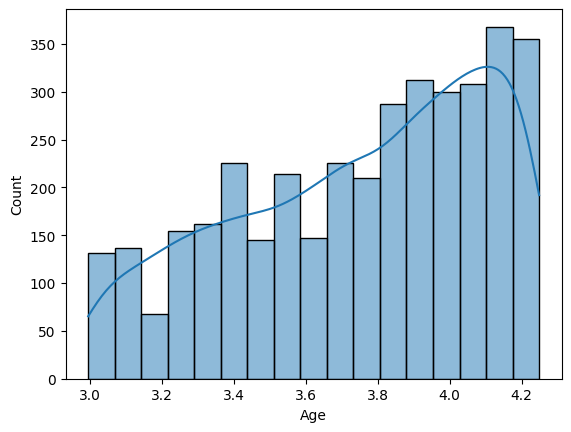

In [154]:
sns.histplot(smc_lin,x=smc_lin["Age"], kde=True)

In [155]:
shapir_age=smc_lin["Age"]
statistics,p_value=shapiro(shapir_age)
print(statistics,p_value)
if p_value>0.05:
 print("data is normal")
else:
 print("data is not normal")

0.9419093132019043 4.623799567325405e-36
data is not normal


In [156]:
Q1 = smc["Age"].quantile(0.25)
Q3 = smc["Age"].quantile(0.75)
IQR = Q3 - Q1
smc_no_outliers = smc[(smc["Age"] >= Q1 - 1.5 * IQR) & (smc["Age"] <= Q3 + 1.5 * IQR)]

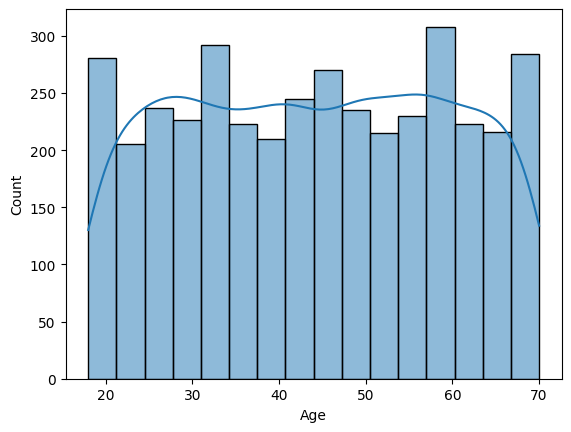

In [157]:
sns.histplot(smc_no_outliers["Age"], kde=True)
plt.show()

In [158]:
smc_lin["Age"]=np.log(smc_lin["Age"])

shapir_age=smc_lin["Age"]
statistics,p_value=shapiro(shapir_age)
print(statistics,p_value)
if p_value>0.05:
 print("data is normal")
else:
 print("data is not normal, but close to normal distribution")

0.9321163892745972 2.629516389607633e-38
data is not normal, but close to normal distribution


C:\Users\Muhammad\AppData\Local\Temp\ipykernel_4404\2515282573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smc_lin["Age"]=np.log(smc_lin["Age"])


In [159]:
# from scipy.stats import yeojohnson


# # Add a small constant to handle zero values
# constant = 0.001
# transformed_age, lambda_value = yeojohnson(smc_no_outliers['Age'] + constant)
# print("lambda_value:", lambda_value)

# statistic,p_value=shapiro(transformed_age)
# p_value
# if p_value>0.05:
#     print("data is notmal")
# else:
#     print("data is still not normal")

# shapir_age=smc_no_outliers["Age"]
# statistics,p_value=shapiro(shapir_age)
# print(statistics,p_value)
# if p_value>0.05:
#  print("data is normal")
# else:
#  print("data is not normal")





array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Purchase Amount (USD)'}>,
        <Axes: title={'center': 'Review Rating'}>],
       [<Axes: title={'center': 'Previous Purchases'}>, <Axes: >]],
      dtype=object)

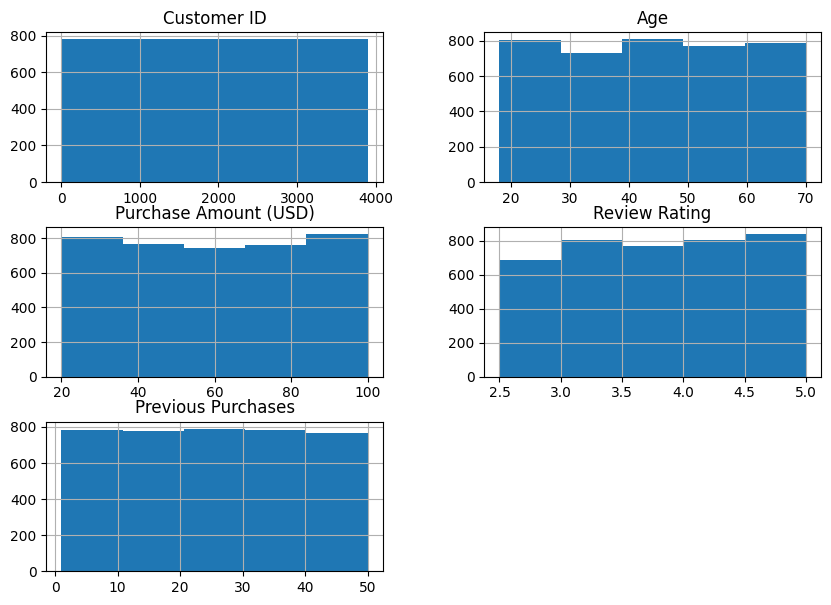

In [160]:
smc.hist(bins=5,figsize=(10,7))

In [161]:
smc.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


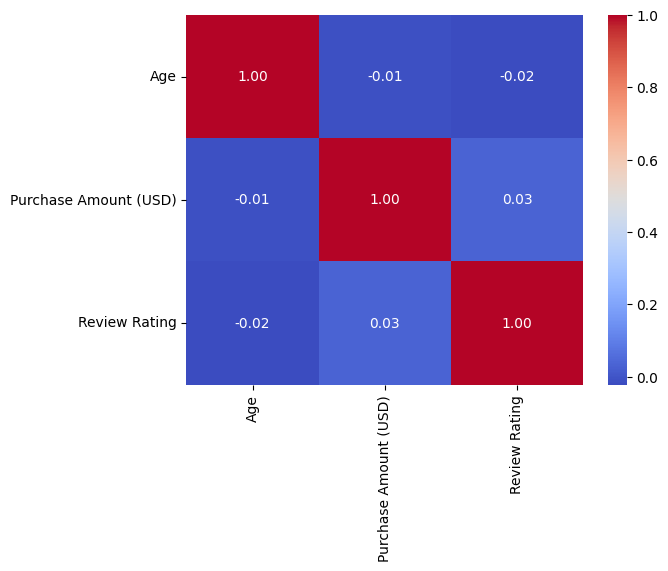

In [162]:
selected_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating']
g = sns.heatmap(smc[selected_columns].corr(), fmt=".2f", cmap="coolwarm", annot=True)

# Show the plot
plt.show()

# g=sns.heatmap(smc[smc["Age","Purchase Amount (USD)","Review Rating"]].corr(),fmt=".2f",cmap="coolwarm")
# g


In [163]:
smc.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='Age'>

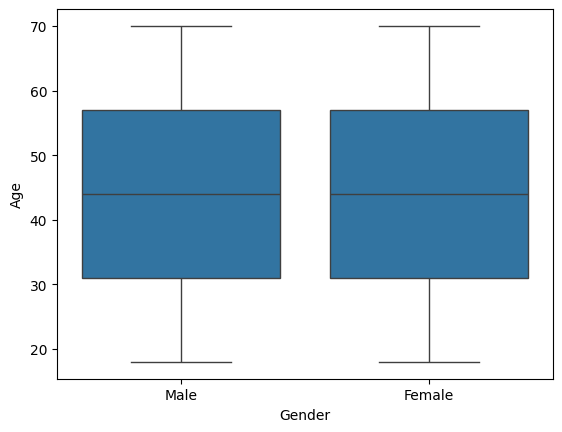

In [164]:
#plot boxplot to check data distribution and outliers
sns.boxplot(data=smc,x="Gender",y="Age")


<Axes: xlabel='Age', ylabel='Item Purchased'>

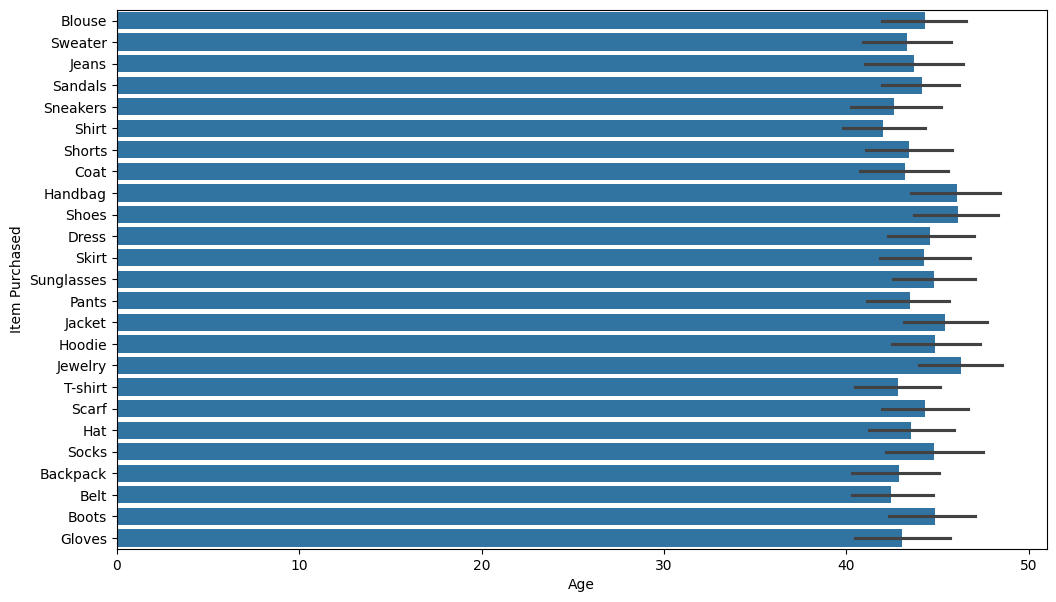

In [165]:
plt.figure(figsize=(12,7))
sns.barplot(data=smc,y="Item Purchased",x="Age")

In [166]:
smc.dtypes


Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [167]:
smc['Age'] = pd.to_numeric(smc['Age'], errors='coerce').astype('Int64')


In [168]:
#will see it later
# maxitems=smc.groupby("Age")["Item Purchased"].max()
# sns.barplot(data=maxitems, x="Age",hue="Item Purchased")

In [169]:
smc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   Int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

<Axes: xlabel='Gender', ylabel='Item Purchased'>

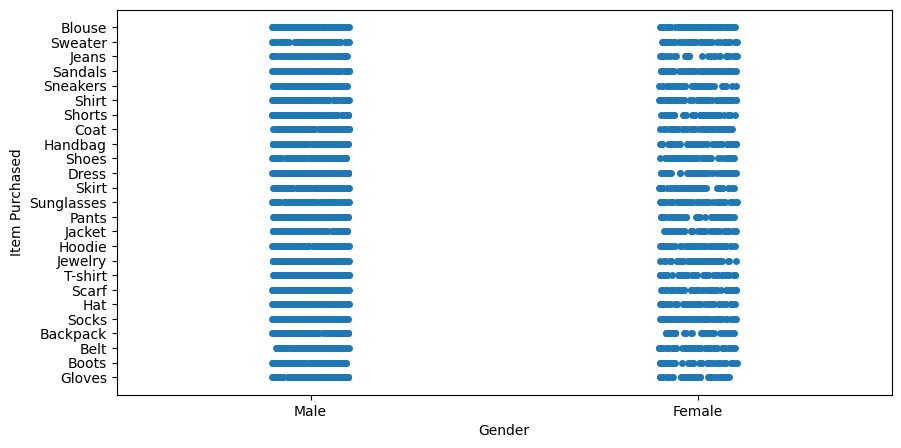

In [170]:
plt.figure(figsize=(10,5))
sns.stripplot(data=smc,x="Gender", y="Item Purchased")

<Axes: xlabel='Size', ylabel='count'>

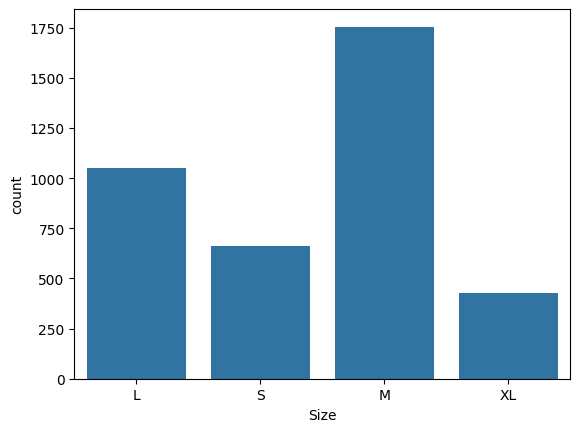

In [171]:
sns.countplot(data=smc,x="Size")

In [172]:
# #Make groups of item purchased and check which item sell more
# find_item_sell=smc.groupby("Item Purchased")["Size"].value_counts().idxmax()
# # find_item_sell=smc["Item Purchased"].value_counts().idxmax()
# find_most_sold_item=smc[smc["Item Purchased"]==find_item_sell]
# age_wise=smc.groupby("Age")["Item Purchased"].value_counts().idxmax()
# age_wise
# sns.countplot(data=find_most_sold_item,x="Size")

In [173]:
smc.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [174]:
maxi_sold_item_count=smc["Item Purchased"].value_counts().max()
print("Maxi Sold Item Count", maxi_sold_item_count)
max_sold_item=smc["Item Purchased"].value_counts().idxmax()
print("Maxi Sold Item", max_sold_item)

Maxi Sold Item Count 171
Maxi Sold Item Blouse


In [175]:
maxi=smc["Size"].value_counts().max()
m_size=smc["Size"].value_counts().idxmax()
print("count of maxi purchase item size",maxi)
print("maximum purchased size",m_size)

count of maxi purchase item size 1755
maximum purchased size M


In [176]:
maxi_pur_color=smc["Color"].value_counts().max()
print("Maxi purchased color",maxi_pur_color)
maxi_count=smc["Color"].value_counts().idxmax()
print("count of Maxi purchased color",maxi_count)

Maxi purchased color 177
count of Maxi purchased color Olive


In [177]:
#check unique value of sizes in subset_mpi
print(Subset_mpi["Size"].unique())

['L' 'M' 'S' 'XL']


In [178]:
#check mean of Review rating item by Size in subset_mpi
print(Subset_mpi.groupby("Size")["Review Rating"].mean())


Size
L     3.678261
M     3.688000
S     3.679310
XL    3.685714
Name: Review Rating, dtype: float64


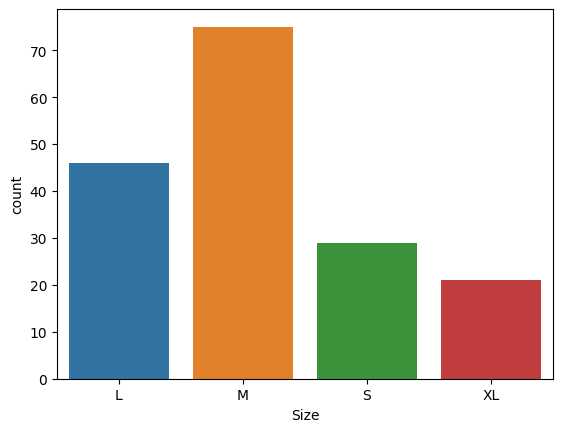

In [179]:
# Most_purchased_item = smc["Item Purchased"].value_counts().idxmax()
# Subset_mpi = smc[smc["Item Purchased"] == Most_purchased_item]
# sns.countplot(data=Subset_mpi, x="Size", color="Green")
rating_purchasing = smc["Item Purchased"].value_counts().idxmax()
Subset_mpi = smc[smc["Item Purchased"] == rating_purchasing]
high_rating=Subset_mpi .groupby("Item Purchased")["Review Rating"].mean().idxmax()
final_subset=Subset_mpi[Subset_mpi["Item Purchased"]==high_rating]
final_subset
sns.countplot(data=final_subset,x="Size",hue="Size")
plt.show()


Size
L     3.678261
M     3.688000
S     3.679310
XL    3.685714
Name: Review Rating, dtype: float64


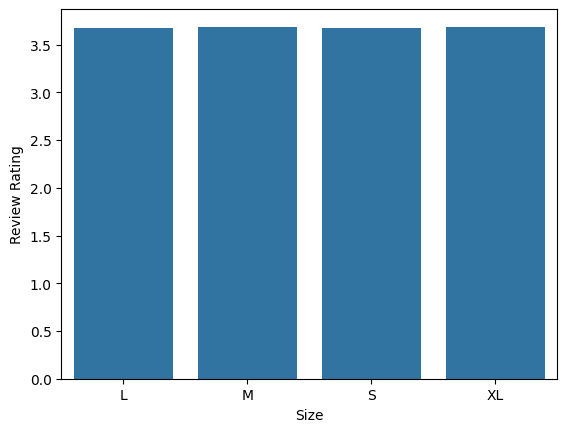

In [180]:
most_purchasing_item=smc["Item Purchased"].value_counts().idxmax()
subset_mpi=smc[smc["Item Purchased"]==most_purchasing_item]
average_rating=subset_mpi.groupby("Size")["Review Rating"].mean().reset_index()
sns.barplot(data=average_rating, x="Size",y="Review Rating")
print(Subset_mpi.groupby("Size")["Review Rating"].mean())

<Axes: xlabel='Color', ylabel='count'>

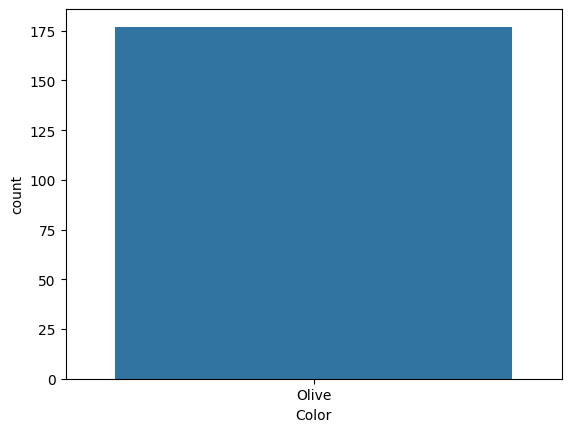

In [181]:
most_purchased_color=smc["Color"].value_counts().idxmax()
Subset_mpo=smc[smc["Color"]==most_purchased_color]
sns.countplot(data=Subset_mpo, x="Color")


In [182]:
# Minim_purchased_item = smc["Item Purchased"].value_counts().idxmin()
# Subset_mpi = smc[smc["Item Purchased"] == Minim_purchased_item]
# sns.countplot(data=Subset_mpi, x="Size", color="Green")

<Axes: xlabel='Season', ylabel='count'>

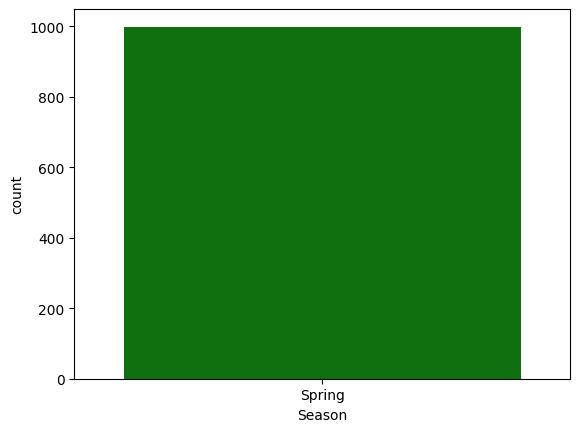

In [183]:
Most_purchasing_item = smc["Season"].value_counts().idxmax()
Subset_mpi = smc[smc["Season"] == Most_purchasing_item]
sns.countplot(data=Subset_mpi, x="Season", color="Green")


<Axes: xlabel='Season', ylabel='count'>

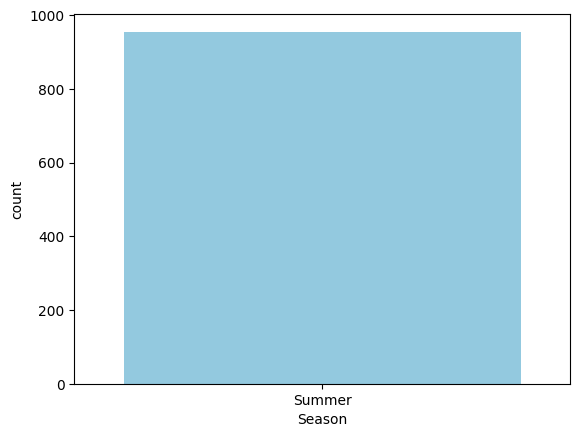

In [184]:
Minim_purchasing_item = smc["Season"].value_counts().idxmin()
Subset_mpi = smc[smc["Season"] == Minim_purchasing_item]
sns.countplot(data=Subset_mpi, x="Season", color="skyblue")


<Axes: xlabel='Season', ylabel='count'>

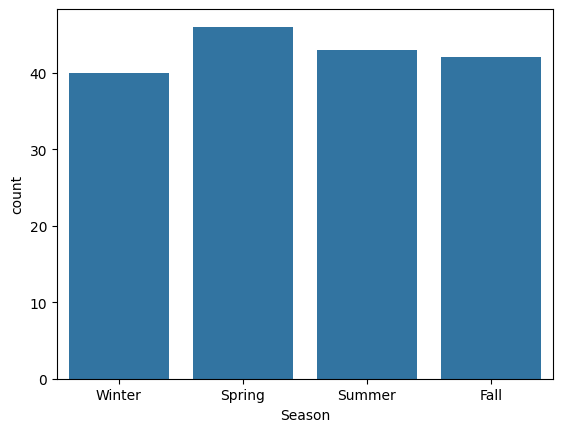

In [185]:
seasonal_purchasing = smc["Item Purchased"].value_counts().idxmax()
Subset_mpi = smc[smc["Item Purchased"] == seasonal_purchasing]
sns.countplot(data=Subset_mpi, x="Season")


<Axes: xlabel='Item Purchased', ylabel='Review Rating'>

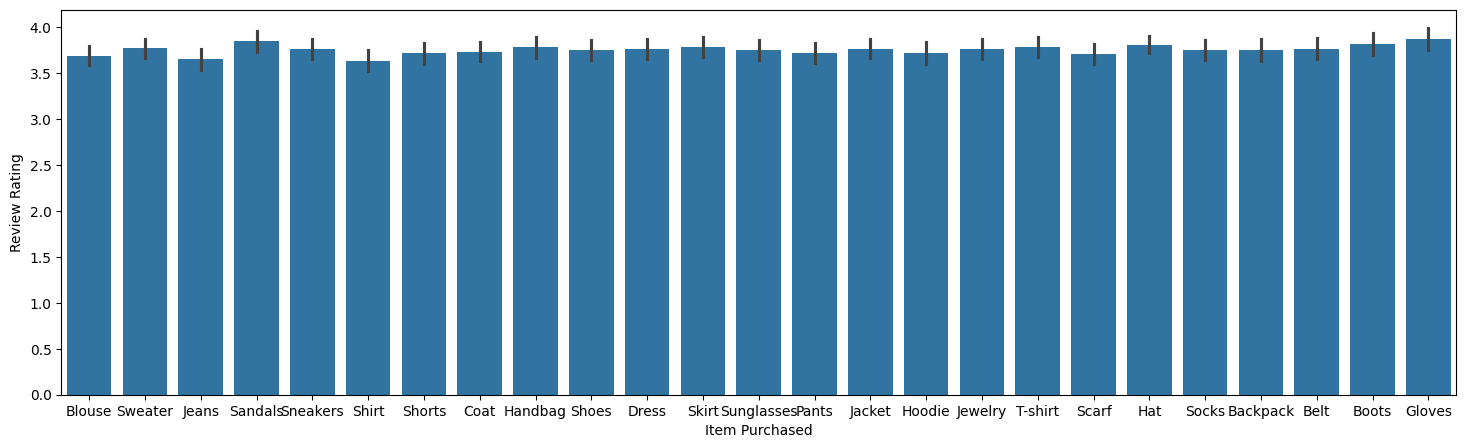

In [186]:
# seasonal_purchasing = smc["Item Purchased"].value_counts().idxmax()
# Subset_mpi = smc[smc["Item Purchased"] == seasonal_purchasing]
plt.figure(figsize=(18,5))
sns.barplot(data=smc, x="Item Purchased",y="Review Rating")


In [187]:
# rating_purchasing = smc["Item Purchased"].value_counts().idxmax()
# Subset_mpi = smc[smc["Item Purchased"] == rating_purchasing]
# high_rating=Subset_mpi .groupby("Item Purchased")["Review Rating"].mean().idxmax()
# final_subset=Subset_mpi[Subset_mpi["Item Purchased"]==high_rating]
# final_subset
# sns.countplot(data=final_subset,x="Size",hue="Size")
# plt.show()


In [188]:
print(Subset_mpi.groupby("Item Purchased")["Review Rating"].value_counts().reset_index())

   Item Purchased  Review Rating  count
0          Blouse            4.0     18
1          Blouse            3.0     14
2          Blouse            3.1     11
3          Blouse            3.3     11
4          Blouse            2.6     10
5          Blouse            2.7      8
6          Blouse            4.2      8
7          Blouse            4.9      7
8          Blouse            4.8      7
9          Blouse            3.9      7
10         Blouse            4.7      6
11         Blouse            3.8      6
12         Blouse            3.7      6
13         Blouse            3.5      6
14         Blouse            3.2      6
15         Blouse            3.4      5
16         Blouse            4.4      5
17         Blouse            4.6      5
18         Blouse            2.9      5
19         Blouse            2.8      5
20         Blouse            4.3      4
21         Blouse            5.0      4
22         Blouse            3.6      3
23         Blouse            4.1      2


In [189]:
print(smc["Item Purchased"].unique())

['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']


In [190]:
smc.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [191]:
Mostly_Choosed_shipping=smc["Shipping Type"].value_counts().idxmax()
Mostly_Choosed_shipping


'Free Shipping'

In [192]:
Pay=smc["Payment Method"].value_counts()
Pay


Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

In [193]:
Mostly_Choosed_Payment_Method=smc["Payment Method"].value_counts().idxmax()
Mostly_Choosed_Payment_Method

'PayPal'

<Axes: xlabel='Payment Method', ylabel='count'>

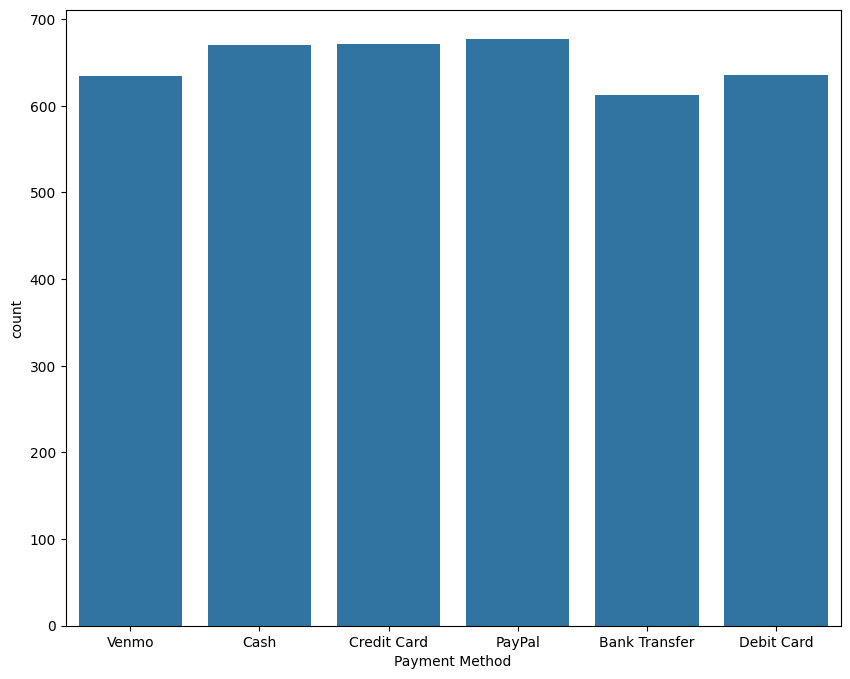

In [194]:
plt.figure(figsize=(10,8))
sns.countplot(data=smc,x="Payment Method")


<Axes: xlabel='Shipping Type', ylabel='count'>

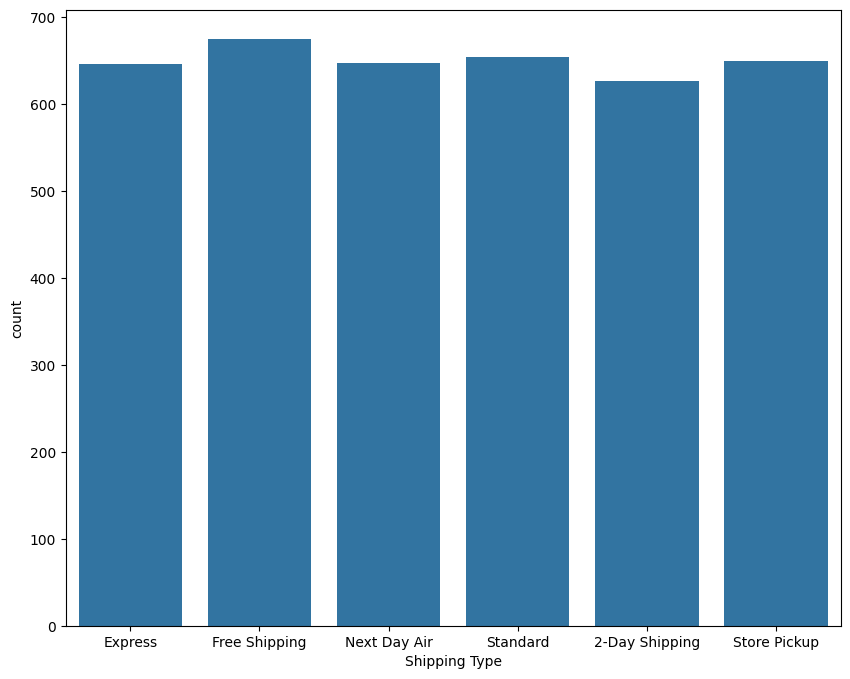

In [195]:
plt.figure(figsize=(10,8))
sns.countplot(data=smc,x="Shipping Type")


In [196]:
# Ages=smc.groupby("Age")['Item Purchased'].value_counts()
Ages=smc[smc["Age"]==70].groupby("Age")['Item Purchased'].value_counts()
Ages
# sns.countplot(data=Ages,x="Age")

Age  Item Purchased
70   Socks             7
     Belt              6
     Jewelry           6
     Scarf             5
     Sweater           4
     Sneakers          4
     Handbag           3
     Hat               3
     Boots             3
     Pants             3
     Shoes             3
     Coat              2
     Skirt             2
     Shorts            2
     Sandals           2
     Blouse            2
     Jacket            2
     Hoodie            2
     Gloves            2
     Shirt             1
     Dress             1
     Jeans             1
     T-shirt           1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Location'>

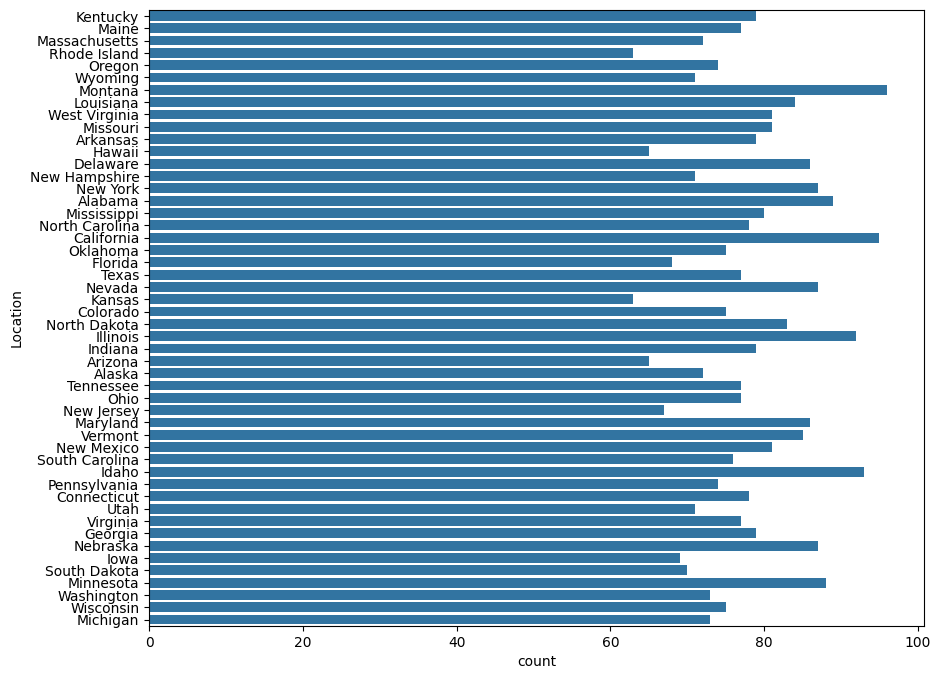

In [197]:
plt.figure(figsize=(10,8))
sns.countplot(data=smc,y="Location")


In [198]:
most_purchases_Location=smc['Location'].value_counts().idxmax()
subset_of_location=smc[smc["Location"]==most_purchases_Location]
most_purchases_Location


'Montana'

In [199]:
min_purchases_Location=smc['Location'].value_counts().idxmin()
subset_of_location_min=smc[smc["Location"]==min_purchases_Location]
min_purchases_Location


'Kansas'

<Axes: xlabel='Location', ylabel='count'>

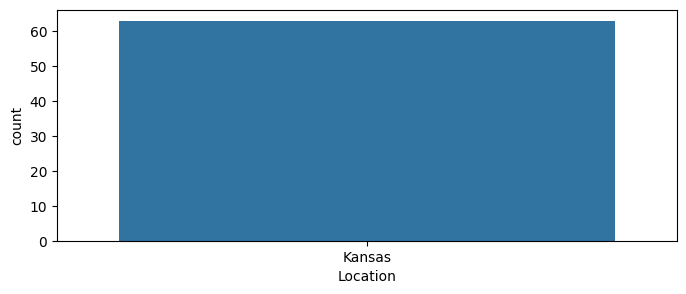

In [200]:
plt.figure(figsize=(8,3))
sns.countplot(data=subset_of_location_min,x="Location")


In [201]:
smc.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

<Axes: xlabel='count', ylabel='Item Purchased'>

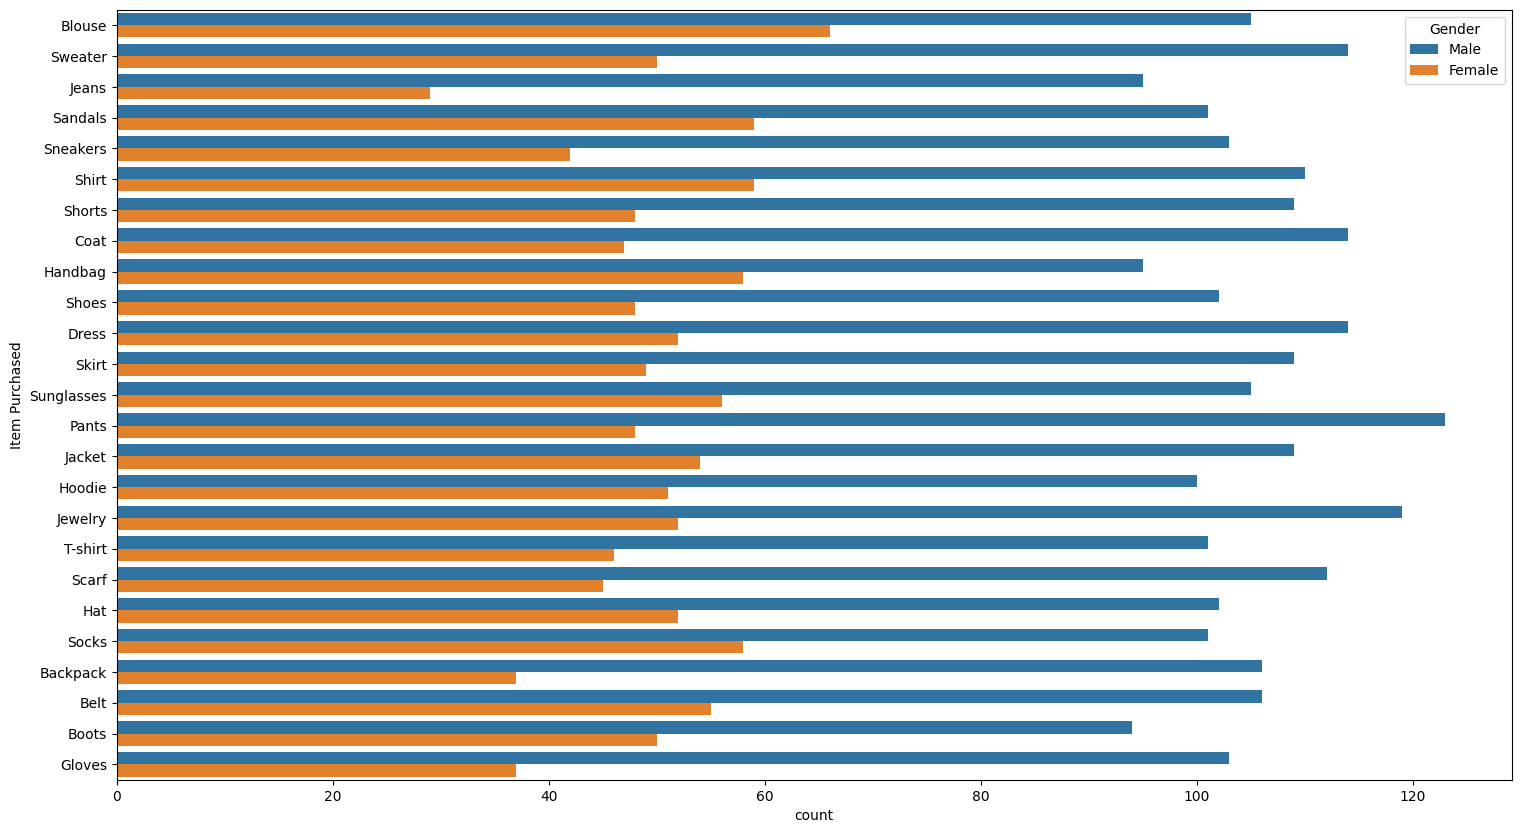

In [202]:
plt.figure(figsize=(18,10))
sns.countplot(data=smc,y="Item Purchased",hue="Gender")

<Axes: xlabel='count', ylabel='Gender'>

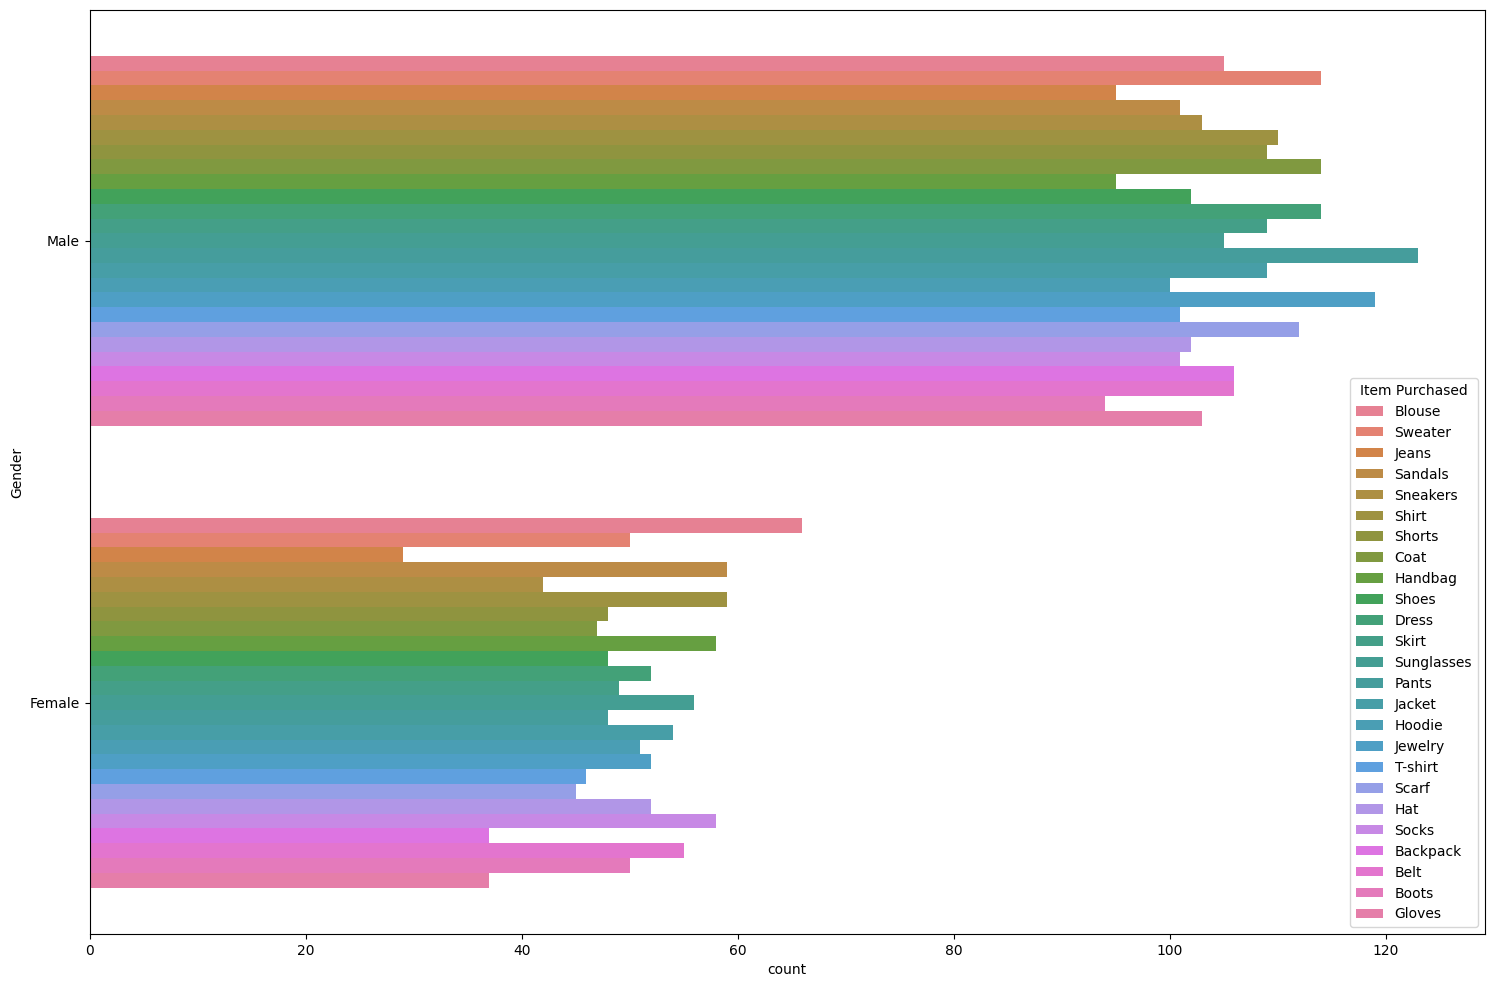

In [203]:
plt.figure(figsize=(18,12))
sns.countplot(data=smc,y="Gender", hue="Item Purchased")


In [204]:
# counts = smc.groupby('Item Purchased')['Gender'].value_counts().idxmax()
counts = smc.groupby('Gender')["Item Purchased"].size()
print(counts)
# count.sort(data=counts)

Gender
Female    1248
Male      2652
Name: Item Purchased, dtype: int64


In [205]:
# counts = smc.groupby('Age')["Item Purchased"].size().reset_index(name="Counts")
# counts.sort_values("Counts",ascending=True,inplace=True)
print("Maximum", counts.max())
print("Minimum", counts.min())
# print(counts)


Maximum 2652
Minimum 1248


In [206]:
Product_sell_byarea=smc.groupby("Item Purchased")["Location"].value_counts().reset_index(name="Count of item")
Product_sell_byarea


,Item Purchased,Location,Count of item
0,Backpack,Nevada,10
1,Backpack,Nebraska,8
2,Backpack,Alaska,5
3,Backpack,Virginia,5
4,Backpack,South Dakota,5
...,...,...,...
1194,T-shirt,Wyoming,2
1195,T-shirt,Georgia,2
1196,T-shirt,Nebraska,1
1197,T-shirt,Rhode Island,1


In [207]:
uni=smc["Item Purchased"].unique()
uni


array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [208]:
Product_sell_byarea=smc[smc["Item Purchased"]=="T-shirt"].groupby("Item Purchased")["Location"].value_counts().reset_index(name="Count of item")
Product_sell_byarea


,Item Purchased,Location,Count of item
0,T-shirt,Wisconsin,6
1,T-shirt,Louisiana,5
2,T-shirt,North Carolina,5
3,T-shirt,Missouri,5
4,T-shirt,Vermont,5
5,T-shirt,Ohio,5
6,T-shirt,Kansas,4
7,T-shirt,New York,4
8,T-shirt,Oregon,4
9,T-shirt,Alaska,4


In [209]:
Product_name_byarea=smc[smc["Item Purchased"]=="Blouse"].groupby("Item Purchased")["Location"].value_counts().reset_index(name="Count of item")
Product_name_byarea

,Item Purchased,Location,Count of item
0,Blouse,Georgia,7
1,Blouse,New Hampshire,7
2,Blouse,Wisconsin,7
3,Blouse,Mississippi,6
4,Blouse,Kansas,6
5,Blouse,Oregon,5
6,Blouse,Connecticut,5
7,Blouse,Delaware,5
8,Blouse,North Dakota,5
9,Blouse,Hawaii,5


In [210]:
Product_sell_byarea=smc[smc["Item Purchased"]=="Blouse"].groupby("Item Purchased")["Location"].value_counts().idxmax()
Product_sell_byarea

('Blouse', 'Georgia')

In [211]:
Product_name_sell_inseason=smc[smc["Item Purchased"]=="Backpack"].groupby("Item Purchased")["Season"].value_counts().idxmax()
print("Product Name", Product_name_sell_inseason)
Product_sell_inseason=smc[smc["Item Purchased"]=="Backpack"].groupby("Item Purchased")["Location"].value_counts().idxmax()
print("Product sell in season", Product_sell_inseason)


Product Name ('Backpack', 'Summer')
Product sell in season ('Backpack', 'Nevada')


In [212]:
# Product_name_sell_inseason=smc[smc["Item Purchased"]=="T-shirt"].max()
# print("Product Name", Product_name_sell_inseason)
# Product_sell_inseason=smc[smc["Item Purchased"]=="T-shirt"].groupby("Item Purchased")["Location"].max()
# print("Product sell in season", Product_sell_inseason)


In [213]:
Product_Name=smc[smc["Item Purchased"]=="Backpack"].groupby("Item Purchased")["Location"].value_counts().idxmax()
Product_Name


('Backpack', 'Nevada')

In [214]:
item_max=smc[smc["Item Purchased"]=="Backpack"].groupby("Item Purchased")["Season"].value_counts().idxmax()
item_max

('Backpack', 'Summer')

Blouse


<Axes: xlabel='count', ylabel='Item Purchased'>

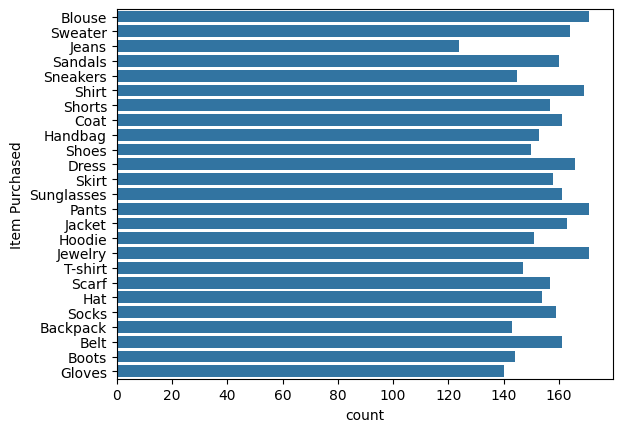

In [215]:
counting=smc["Item Purchased"].value_counts().idxmax()
print(counting)
sns.countplot(data=smc,y="Item Purchased")

<Axes: xlabel='count', ylabel='Item Purchased'>

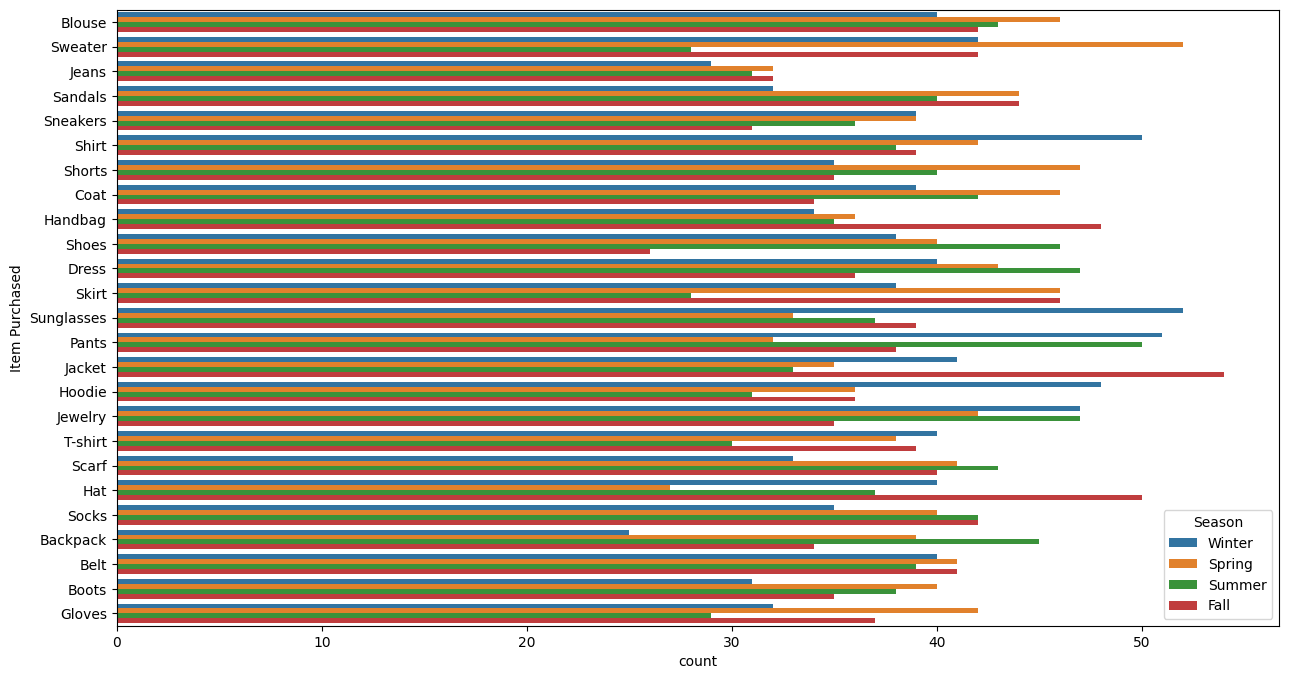

In [216]:
plt.figure(figsize=(15,8))
sns.countplot(data=smc,y="Item Purchased",hue="Season")


In [217]:
Subscibers_status=smc["Subscription Status"].value_counts()
Subscibers_status

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

In [218]:
Categories_status=smc["Category"].value_counts()
Categories_status


Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

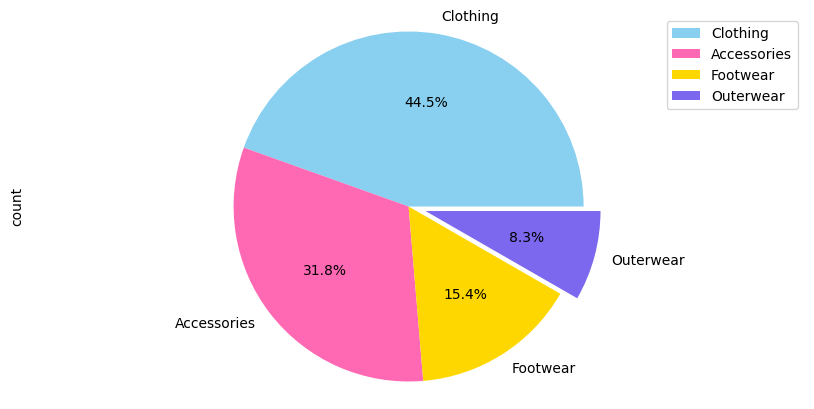

In [219]:
plt.figure(figsize = (10, 5))
counts = smc["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)
counts.plot(kind = 'pie', fontsize = 10, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(loc = "best")
plt.show()


## Model preparation

In [220]:
smc.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [221]:
smc.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [222]:
smc.dtypes

Customer ID                 int64
Age                         Int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [223]:
smc.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.0,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.0,20.000000,2.500000,1.000000
25%,975.750000,31.0,39.000000,3.100000,13.000000
50%,1950.500000,44.0,60.000000,3.700000,25.000000
75%,2925.250000,57.0,81.000000,4.400000,38.000000
max,3900.000000,70.0,100.000000,5.000000,50.000000


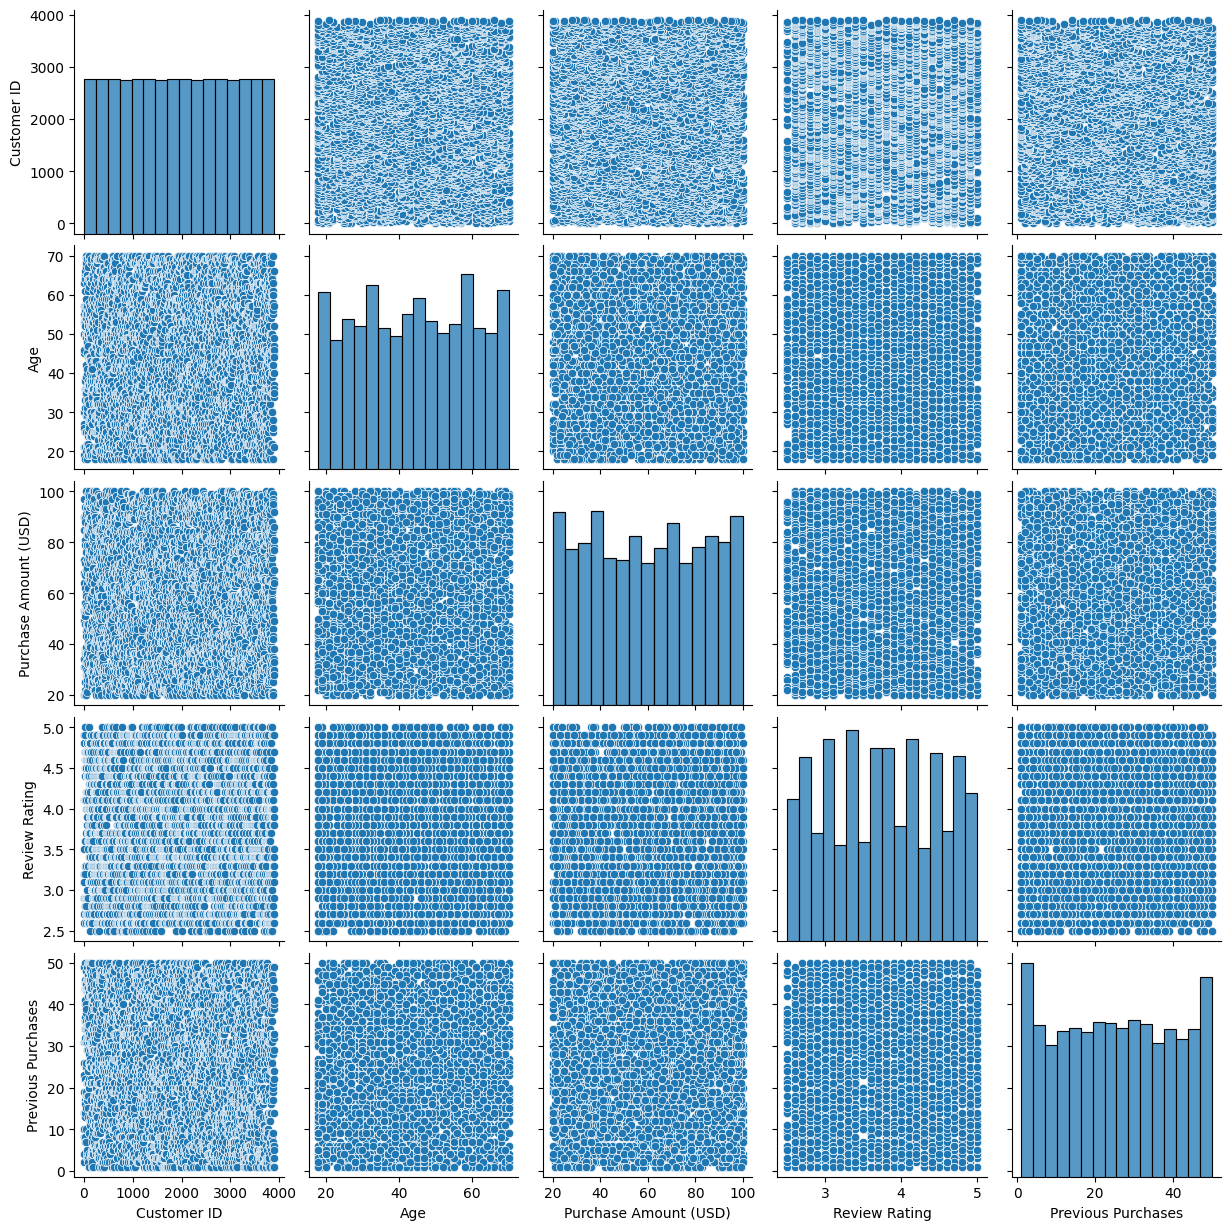

In [224]:
smc_numeric=["Customer ID",	"Age",	"Purchase Amount (USD)",	"Review Rating",	"Previous Purchases"]
sns.pairplot(smc[smc_numeric])
plt.show()

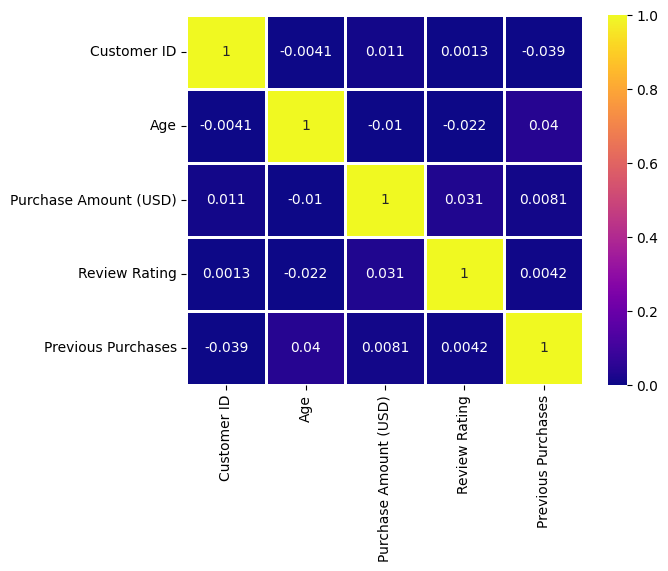

In [225]:
corr_matrix = smc[smc_numeric].corr()
sns.heatmap(corr_matrix, annot=True,linewidths=True, cmap="plasma",vmin=0,vmax=1)
plt.show()

In [226]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

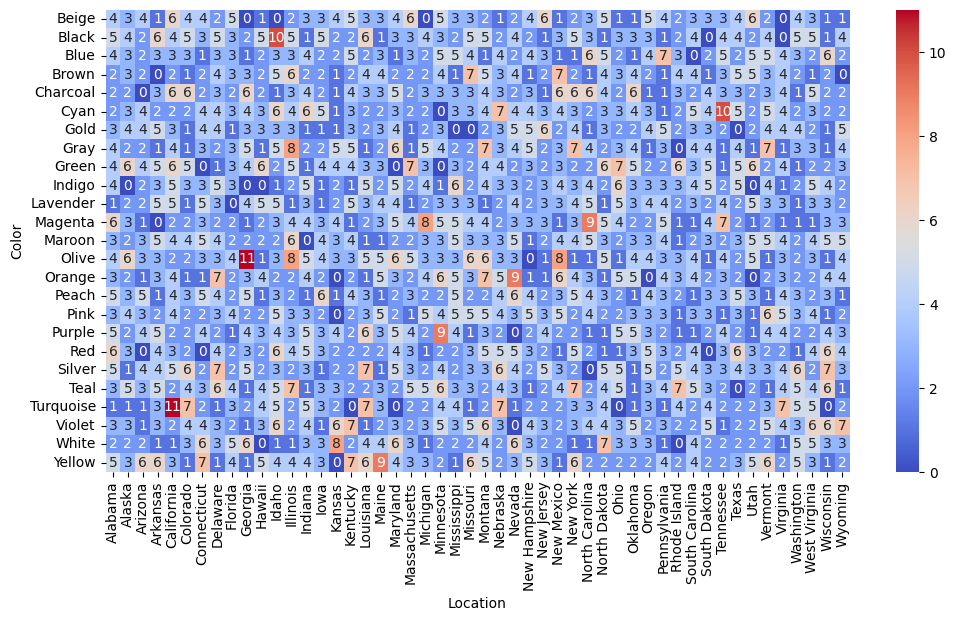

In [227]:
plt.figure(figsize=(12,6))
cross_tab = pd.crosstab(smc['Color'], smc['Location'])
sns.heatmap(cross_tab, annot=True, cmap="coolwarm")
plt.show()

In [228]:
smc.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [229]:
#convert variables in label encoding or one-hot
# Check corr of Purchased amount usd with other variables
#

In [230]:

data_num = smc[['Customer ID', 'Age', 'Gender', 'Purchase Amount (USD)','Item Purchased','Review Rating','Location', 'Size', 'Color', 'Season']]
data_num_dum = pd.get_dummies(data_num, columns=['Gender', 'Item Purchased','Location', 'Size', 'Color', 'Season'])


In [231]:
data_num_dum.head()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,...,Color_Silver,Color_Teal,Color_Turquoise,Color_Violet,Color_White,Color_Yellow,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,1,55,53,3.1,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2,19,64,3.1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3,50,73,3.1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,4,21,90,3.5,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,5,45,49,2.7,False,True,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False


In [232]:
#Check Corrlation with target value'Purchase Amount (USD)' and other featurres value
corr_mat=data_num_dum.corr()
val=corr_mat["Purchase Amount (USD)"]
val

Customer ID              0.011048
Age                     -0.010424
Purchase Amount (USD)    1.000000
Review Rating            0.030776
Gender_Female            0.014044
                           ...   
Color_Yellow            -0.004772
Season_Fall              0.043701
Season_Spring           -0.025439
Season_Summer           -0.032681
Season_Winter            0.014417
Name: Purchase Amount (USD), Length: 114, dtype: float64

In [233]:
data_num.head()

,Customer ID,Age,Gender,Purchase Amount (USD),Item Purchased,Review Rating,Location,Size,Color,Season
0,1,55,Male,53,Blouse,3.1,Kentucky,L,Gray,Winter
1,2,19,Male,64,Sweater,3.1,Maine,L,Maroon,Winter
2,3,50,Male,73,Jeans,3.1,Massachusetts,S,Maroon,Spring
3,4,21,Male,90,Sandals,3.5,Rhode Island,M,Maroon,Spring
4,5,45,Male,49,Blouse,2.7,Oregon,M,Turquoise,Spring


In [234]:
data_num_dum.head()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,...,Color_Silver,Color_Teal,Color_Turquoise,Color_Violet,Color_White,Color_Yellow,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,1,55,53,3.1,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2,19,64,3.1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3,50,73,3.1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,4,21,90,3.5,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,5,45,49,2.7,False,True,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False


In [235]:
corr_mat.head()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,...,Color_Silver,Color_Teal,Color_Turquoise,Color_Violet,Color_White,Color_Yellow,Season_Fall,Season_Spring,Season_Summer,Season_Winter
Customer ID,1.000000,-0.004079,0.011048,0.001343,0.807960,-0.807960,-0.021972,0.004367,0.045498,-0.005773,...,-0.005019,-0.016956,-0.014410,0.001715,-0.022425,-0.000254,0.020254,-0.001050,-0.012225,-0.007065
Age,-0.004079,1.000000,-0.010424,-0.021949,-0.002763,0.002763,-0.015055,-0.022210,0.003071,0.010028,...,0.002716,0.014802,0.013019,0.032380,0.020641,-0.005465,0.012277,0.019841,-0.003544,-0.028798
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.014044,-0.014044,0.005167,0.000704,0.010063,0.023651,...,-0.026674,0.009467,-0.034440,0.017383,0.023610,-0.004772,0.043701,-0.025439,-0.032681,0.014417
Review Rating,0.001343,-0.021949,0.030776,1.000000,-0.008164,0.008164,0.000681,0.003344,-0.019832,0.017103,...,-0.007549,-0.003647,0.013356,-0.028541,0.009954,0.034527,-0.016124,0.033304,-0.019318,0.001739
Gender_Female,0.807960,-0.002763,0.014044,-0.008164,1.000000,-1.000000,-0.025620,0.009615,0.030282,0.011426,...,-0.008970,-0.005461,-0.018594,-0.000327,-0.001291,0.011502,0.020311,-0.004634,-0.009715,-0.006000


##Check the missing value

In [236]:
smc.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## Model Building

In [237]:
data_num_dum.head()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,...,Color_Silver,Color_Teal,Color_Turquoise,Color_Violet,Color_White,Color_Yellow,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,1,55,53,3.1,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2,19,64,3.1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3,50,73,3.1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,4,21,90,3.5,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,5,45,49,2.7,False,True,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False


In [238]:
#Linear Regression
# X = data_num_dum.drop(columns=["Purchase Amount (USD)"])
X_new=data_num_dum[["Age","Gender_Male","Review Rating"]]
y = data_num_dum["Purchase Amount (USD)"]



In [239]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


model= LinearRegression()
model.fit(X_new,y)

LinearRegression()

In [240]:
# WE have to give below three X_new values for prediction of y
#X_new=data_num_dum[["Age","Gender_Male","Review Rating"]]
# model.predict([[42, 0 , 3.1]])
model.predict([[50,0,2.4]])

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([58.79760565])

## Model is predicting on the bases of X_new, 
## Now we have to evaluate this model that on different inputs, 
## the response of the model is approperiate?
## Do sampling of data in train and test

In [241]:
X_new=data_num_dum[["Age","Gender_Male","Review Rating"]]
y=data_num_dum["Purchase Amount (USD)"]

X_new_train,X_new_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2)

model = LinearRegression()
model.fit(X_new_train,y_train)

y_pred = model.predict(X_new_test)



<Axes: xlabel='Purchase Amount (USD)'>

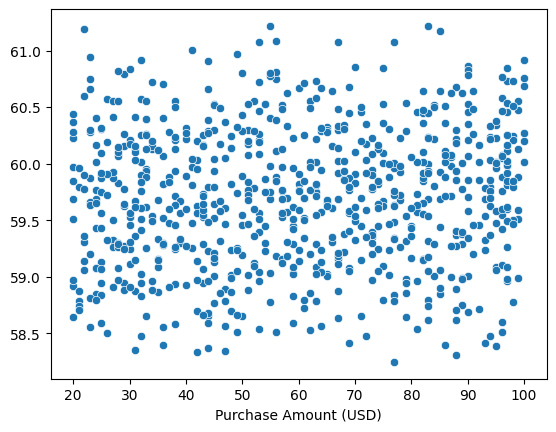

In [242]:
sns.scatterplot(x=y_test,y=y_pred)

# sns.regplot(x=X_new,y=y,scatter=False,color="red")

In [243]:
#Use Evaluation Metrics for assessment of our model 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
r2 = r2_score(y_test,y_pred)
print("mean_absolute_error:", mae)
print("mean_squared_error:", mse)
print("root_mean_squared_error:", rmse)
print("r2_score:", r2)

mean_absolute_error: 20.58756055999801
mean_squared_error: 562.1690472988242
root_mean_squared_error: 23.71010432914255
r2_score: 0.0027448152363060974


## RandomForest Classifier
(I choose this model because i am working the continuous variables)
## RandomForestClassifier
## Most code will be same but few changes will be required

In [244]:
#DecisionTreeClassifier
# X = data_num_dum.drop(columns=["Purchase Amount (USD)"])
X_new=data_num_dum[["Age","Gender_Male","Review Rating"]]
y = data_num_dum["Purchase Amount (USD)"]


In [245]:
# from sklearn.metrics import confusion_matrix
# model = DecisionTreeClassifier()
# model.fit(X_new_train,y_train)



from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

ran_model = RandomForestClassifier()
ran_model.fit(X_new_train,y_train)


ran_predic= ran_model.predict(X_new_test)

In [255]:
# model.predict([[42, 0 , 3.1]])
ran_model.predict([[50,0,2.4]])

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([49], dtype=int64)

In [247]:
ran_mae  = mean_absolute_error(y_test,ran_predic)
ran_mse  = mean_squared_error(y_test,ran_predic)
ran_rmse = mean_squared_error(y_test,ran_predic,squared=False)
ran_r2   = r2_score(y_test,ran_predic)

print("mean_absolute_error",ran_mae)
print("mean_squared_error",ran_mse)
print("root_mean_absolute_error",ran_rmse)
print("r2_score", ran_r2)

mean_absolute_error 26.897435897435898
mean_squared_error 1095.0897435897436
root_mean_absolute_error 33.09214020866199
r2_score -0.9426254964121357


In [248]:
#Apply SVM(Support Vector Machine)
#It is good for both classification and regression

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


X_new=data_num_dum[["Age","Gender_Male","Review Rating"]]
y = data_num_dum["Purchase Amount (USD)"]


In [249]:
sv_model = SVR()
sv_model.fit(X_new_train,y_train)

sv_predict=sv_model.predict(X_new_test)


In [250]:
# sv_predict([[42, 0 , 3.1]])
sv_model.predict([[55,1,2.4]])

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([58.88380603])

In [251]:
sv_mae  = mean_absolute_error(y_test,sv_predict)
sv_mse  = mean_squared_error(y_test,sv_predict)
sv_rmse = mean_squared_error(y_test,sv_predict,squared=False)
sv_r2   = r2_score(y_test,sv_predict)

print("mean_absolute_error",sv_mae)
print("mean_squared_error",sv_mse)
print("root_mean_absolute_error",sv_rmse)
print("r2_score", sv_r2)

mean_absolute_error 20.61298733359662
mean_squared_error 563.9250995801559
root_mean_absolute_error 23.747107183405642
r2_score -0.00037031934943576594


## As check different metrics, it is found that 
## SVM is good model for this dataset.
## Hyperparameters tunningTo optimize the working of model

In [252]:
#Import GridCV for hyperparameters that envloves to search best values of hyperparameter
from sklearn.model_selection import GridSearchCV

#
grid_para={
    "C"      : [0.1,1,10],
    "kernel" : ["linear","rbf"],
    "gamma"  : [0.1,0,10]
    }

grid_Search= GridSearchCV(SVR(),grid_para, cv=5)

grid_Search.fit(X_new_train,y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0, 10],
                         'kernel': ['linear', 'rbf']})

In [253]:
best_params = grid_Search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_Search.best_estimator_

# Evaluate the best model on the test set
best_model_predictions = best_model.predict(X_new_test)
best_model_mse = mean_squared_error(y_test, best_model_predictions)
print("Best Model Mean Squared Error:", best_model_mse)

Best Hyperparameters: {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}


Best Model Mean Squared Error: 564.1922695622497


In [254]:
#save model
import joblib
joblib.dump(sv_model,"SVM_model.sk1")

['SVM_model.sk1']

## Concepts of statistic and ML used in above code

**Data Exploration and Visualization**, 

**Data Preprocessing**,

**Linear Regression Model**,
 
**RandomForest Classifier**,

**Support Vector Machine (SVM)**,

**Hyperparameter Tuning**